<a href="https://colab.research.google.com/github/ibedoor/Coding-Dojo-Python/blob/main/video_game_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

Install Kaggle

In [1]:
!pip install -q kaggle

Import Files

In [5]:
from google.colab import files

Run to upload File

In [27]:
# choose kaggle.json
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bedooralharbi","key":"6e22b509f58439b84385a6babda8e35a"}'}

Make Directory

In [28]:
!mkdir -p ~/.kaggle

Save `kaggle.json` File in `kaggle` Folder

In [29]:
!cp kaggle.json ~/.kaggle/

Edit the Permissions

In [31]:
!chmod 600 ~/.kaggle/kaggle.json

Display Datasets

In [32]:
!kaggle datasets list

ref                                                           title                                                size  lastUpdated          downloadCount  
------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
utkarshxy/who-worldhealth-statistics-2020-complete            World Health Statistics 2020|Complete|Geo-Analysis    1MB  2021-01-14 18:29:44           3100  
gpreda/pfizer-vaccine-tweets                                  Pfizer Vaccine Tweets                               562KB  2021-01-14 15:05:55           1939  
arashnic/covid19-case-surveillance-public-use-dataset         Covid-19 Case Surveillance Public Use Dataset        46MB  2020-12-21 02:24:21           1599  
ashkhagan/women-representation-in-city-property-sanfrancisco  Women Representation in City Property SanFrancisco    3KB  2020-12-13 05:18:14            457  
google/android-smartphones-high-accuracy-datasets   

Download your Dataset, get it from Copy API Command

In [109]:
!kaggle datasets download -d gregorut/videogamesales

  0% 0.00/381k [00:00<?, ?B/s]
100% 381k/381k [00:00<00:00, 51.6MB/s]


In [110]:
!ls

'FIFA-21 Complete.csv'	 sample_data
 final_data.csv		 teams_fifa21.csv
 kaggle_dataset		 videogamesales.zip
 kaggle.json		 YoutubeMostPopularInUS_TR_FR_DE.csv
 players_fifa21.csv


Unzip Dataset

In [111]:
!unzip \*.zip && rm *.zip

Archive:  videogamesales.zip
  inflating: vgsales.csv             


Read Dataset

In [112]:
video_game = pd.read_csv('vgsales.csv')

Create DataFrame

In [113]:
sales = pd.DataFrame(video_game)

Show the Dataset

In [114]:
sales

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


Show the Columns

In [260]:
sales.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

###**Cleaning Data**

Check If There Are Any Null Values

In [263]:
sales.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Display the Total Numbers for Each Genre

In [199]:

group_genre = sales.groupby(["Genre"])["Rank"].count()
group_genre

Genre
Action          3316
Adventure       1286
Fighting         848
Misc            1739
Platform         886
Puzzle           582
Racing          1249
Role-Playing    1488
Shooter         1310
Simulation       867
Sports          2346
Strategy         681
Name: Rank, dtype: int64

Display the Total Numbers for Rank Per Year

In [148]:
group_year = sales.groupby(["Year"])["Rank"].count()
group_year

Year
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     349
2001.0     482
2002.0     829
2003.0     775
2004.0     763
2005.0     941
2006.0    1008
2007.0    1202
2008.0    1428
2009.0    1431
2010.0    1259
2011.0    1139
2012.0     657
2013.0     546
2014.0     582
2015.0     614
2016.0     344
2017.0       3
2020.0       1
Name: Rank, dtype: int64

###**Visualization**

Which Type of Platform was the Highest?

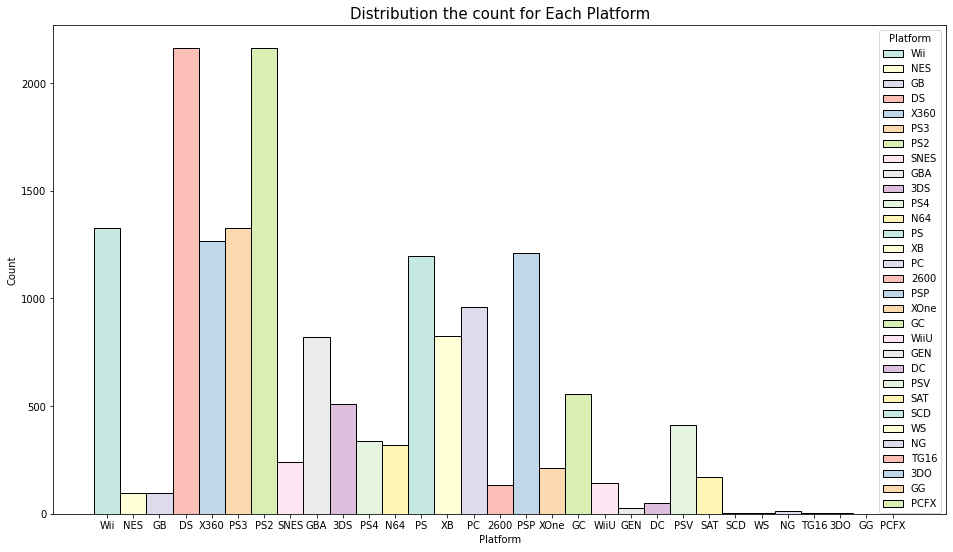

In [235]:
plt.figure(figsize=(16,9))
sns.histplot(x="Platform", hue="Platform",
              palette="Set3", data=sales).set_title('Distribution the count for Each Platform', fontsize=15);

In [137]:
sales['Global_Sales'].max()

82.74

Which Year It Had the Highest Global Sales?

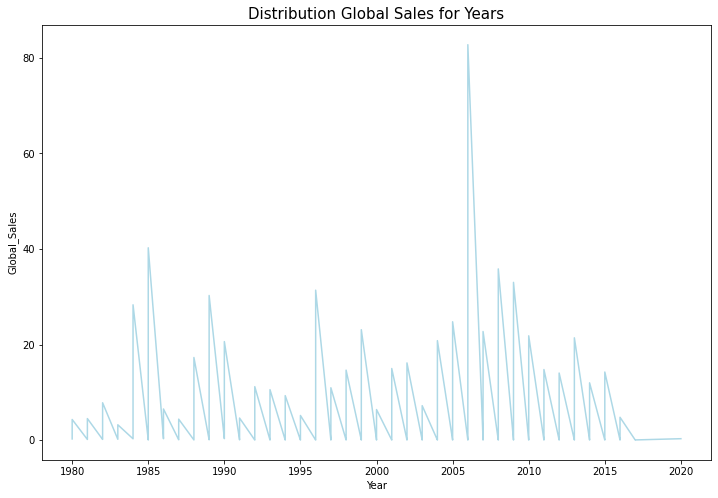

In [234]:
plt.figure(figsize=(12,8))
sns.lineplot(x='Year', y='Global_Sales',
             color='lightblue', estimator=None,
             data = sales).set_title('Distribution Global Sales for Years', fontsize=15);

In [173]:
a = sales.groupby(['Platform'])['Rank'].count()
a

Platform
2600     133
3DO        3
3DS      509
DC        52
DS      2163
GB        98
GBA      822
GC       556
GEN       27
GG         1
N64      319
NES       98
NG        12
PC       960
PCFX       1
PS      1196
PS2     2161
PS3     1329
PS4      336
PSP     1213
PSV      413
SAT      173
SCD        6
SNES     239
TG16       2
WS         6
Wii     1325
WiiU     143
X360    1265
XB       824
XOne     213
Name: Rank, dtype: int64

Choose a Color for Pie Chart

In [230]:
cs = cm.Set3(np.arange(12)/12.)

Visualize the Percentage of Genres

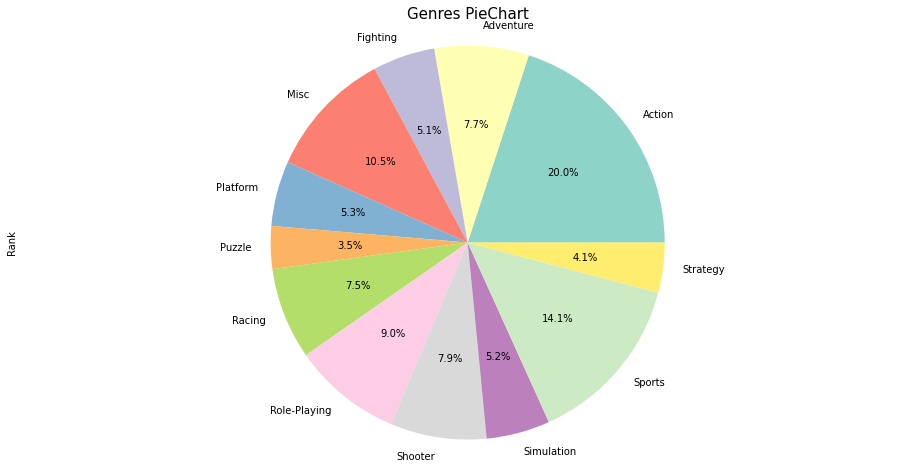

In [238]:
plt.figure(figsize=(16,8))
group_genre.plot.pie(autopct='%.1f%%', colors = cs).axis('equal')
plt.title('Genres PieChart', fontsize=15);

Sum Sales for NA, EU, and JP

In [242]:
# sum of NA
na = sales['NA_Sales'].sum()
na

4392.950000000001

In [243]:
# sum of EU
eu = sales['EU_Sales'].sum()
eu

2434.1299999999997

In [244]:
# sum of JP
jp = sales['JP_Sales'].sum()
jp

1291.0200000000002

In [249]:
total_sales = np.array([na, eu, jp])
ser = pd.Series(total_sales,index=['NA','EU','JP'])
ser

NA    4392.95
EU    2434.13
JP    1291.02
dtype: float64

Which Country has the Hieghest Sales?

In [254]:
cs_2 = cm.Set3(np.arange(3)/3.)

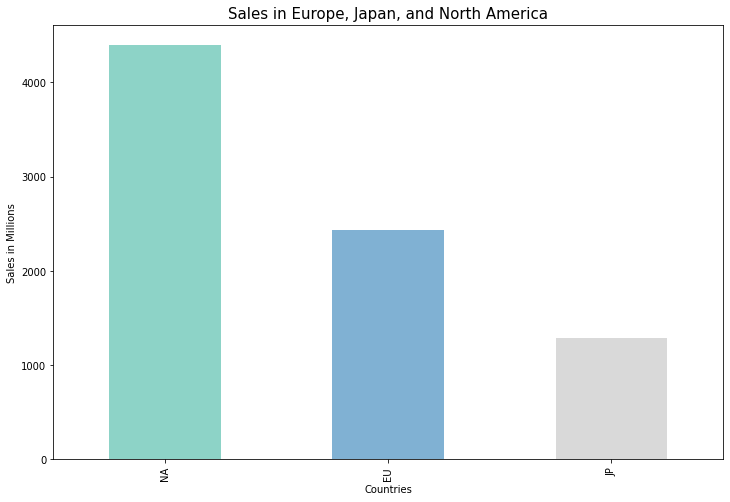

In [259]:
plt.figure(figsize=(12,8))
plt.xlabel('Countries')
plt.ylabel('Sales in Millions')
ser.plot.bar(color=cs_2).set_title('Sales in Europe, Japan, and North America', fontsize=15);